#Kmeans - using a data 

In [ ]:
#Bring all the required data 

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler # New 
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer #New
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [ ]:
#get the data 


dataset = pd.read_csv('/content/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


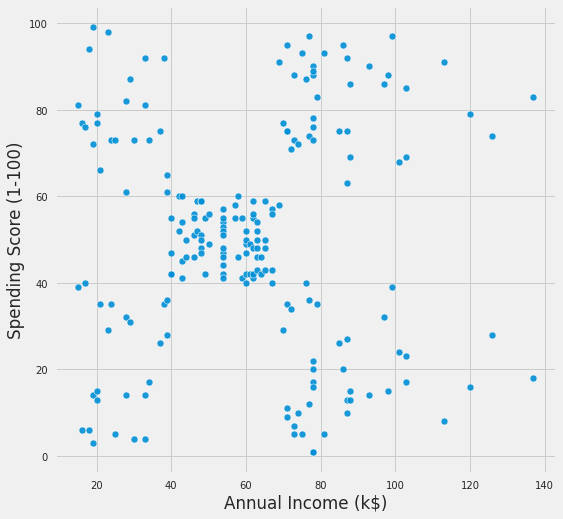

In [ ]:
#EDA

plt.figure(figsize=(8, 8))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=dataset, alpha=0.9)

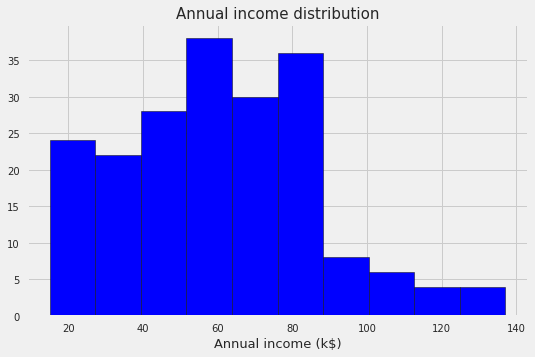

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Annual income distribution",fontsize=15)
plt.xlabel ("Annual income (k$)",fontsize=13)
plt.grid(True)
plt.hist(dataset['Annual Income (k$)'],color='blue',edgecolor='k')
plt.show()

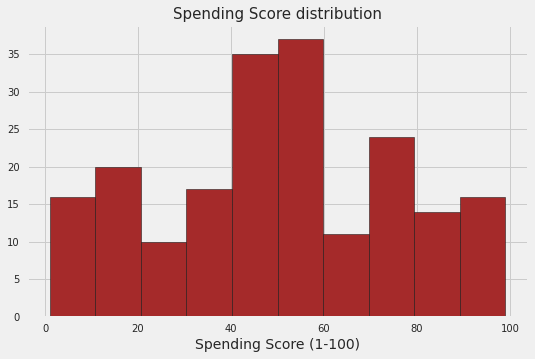

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Spending Score distribution",fontsize=15)
plt.xlabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.hist(dataset['Spending Score (1-100)'],color='brown',edgecolor='k')
plt.show()


In [ ]:
data_x = dataset.iloc[:, 3:5]
data_x.head()
x_array =  np.array(data_x)
x_array

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

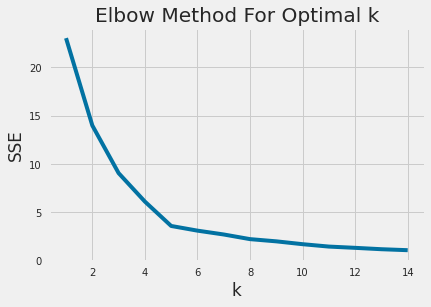

In [ ]:
#Ellbow method

Sum_of_squared_distances =[]
K = range(1,15)
for k in K:
    km =KMeans(n_clusters =k)
    km =km.fit(x_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

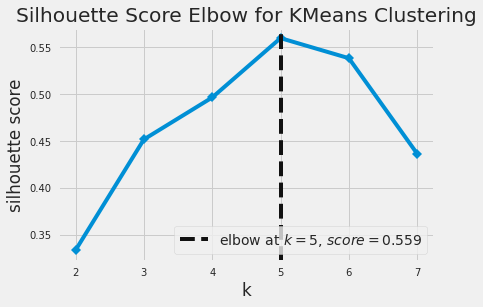

In [ ]:
model = KMeans(random_state=123) 
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False)

visualizer.fit(x_scaled)    
visualizer.poof()

In [ ]:
numerics = dataset[['Annual Income (k$)','Spending Score (1-100)']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in numerics:
        scaler.fit(dataset[[i]])
        dataset[i] = scaler.transform(dataset[[i]])
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(dataset[['Annual Income (k$)', 'Spending Score (1-100)']])
y_predicted

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
#prdict 

dataset["Cluster"] = y_predicted
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,0.000000,0.387755,0
1,2,Male,21,0.000000,0.816327,3
2,3,Female,20,0.008197,0.051020,0
3,4,Female,23,0.008197,0.775510,3
4,5,Female,31,0.016393,0.397959,0
5,6,Female,22,0.016393,0.765306,3
6,7,Female,35,0.024590,0.051020,0
7,8,Female,23,0.024590,0.948980,3
8,9,Male,64,0.032787,0.020408,0
9,10,Female,30,0.032787,0.724490,3


In [ ]:
km.cluster_centers_

array([[0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.33029751, 0.49508692]])

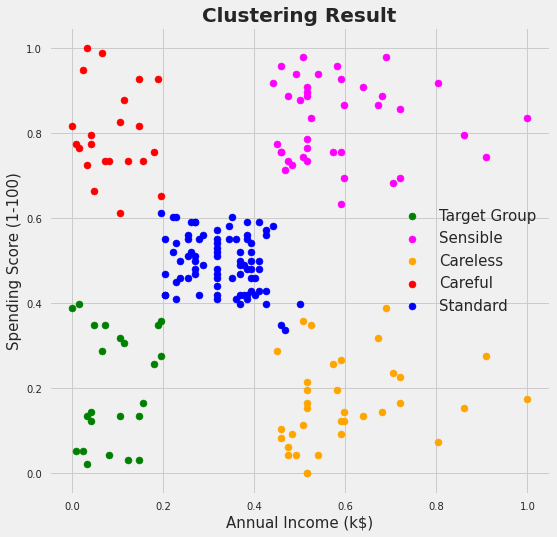

In [ ]:
plt.figure(figsize=(8,8))
df1 = dataset[dataset.Cluster==0]
df2 = dataset[dataset.Cluster==1]
df3 = dataset[dataset.Cluster==2]
df4 = dataset[dataset.Cluster==3]
df5 = dataset[dataset.Cluster==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green', label='Target Group')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='magenta', label='Sensible')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='orange', label='Careless')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='red', label='Careful')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='blue', label='Standard')
plt.title('Clustering Result', fontweight='bold',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

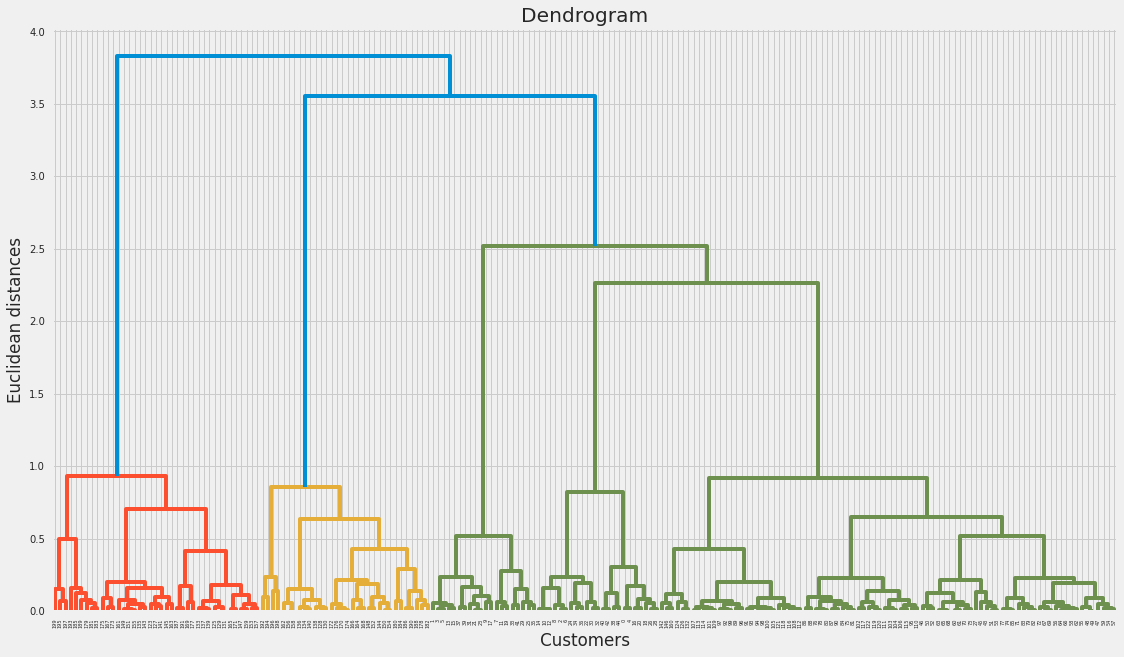

In [ ]:
#hierarchy
X = dataset.iloc[:,[3,4]].values
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
plt.figure(figsize=(17,10))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

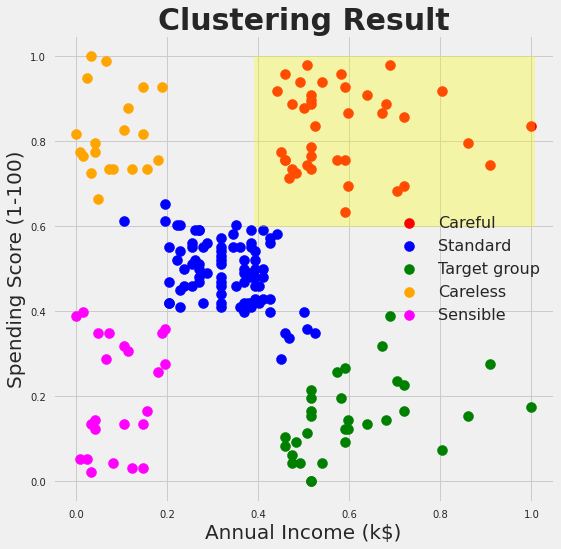

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
plt.figure(figsize=(8,8))

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target group')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')

plt.title('Clustering Result', fontweight='bold',fontsize=30)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend(fontsize=16)

plt.grid(True)
plt.axhspan(ymin=.6,ymax=1,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()

In [ ]:
#DBscan
dataset = pd.read_csv('/content/Mall_Customers.csv')
dataset.head()
X = dataset.iloc[:, [3, 4]].values




In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)

dataset 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
np.unique(db.labels_)

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purple

array([-1,  0,  1,  2,  3])

In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils

Clus_dataSet = dataset[['Annual Income (k$)','Spending Score (1-100)']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
# Compute DBSCAN
db = DBSCAN(eps=0.4, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
dataset['Clus_Db']=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
# A sample of clusters
print(dataset[['Annual Income (k$)','Spending Score (1-100)']].head())
# Number of Labels
print("number of labels: ", set(labels))

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40
number of labels:  {0, 1, 2, 3, -1}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


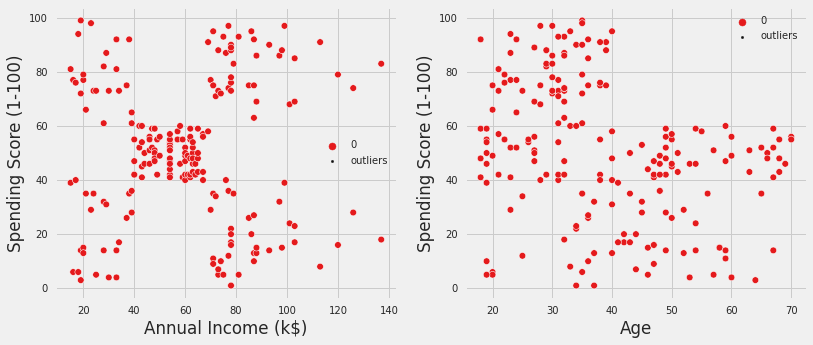

In [ ]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(Clus_dataSet)
X_numerics = dataset[['Age','Annual Income (k$)', 'Spending Score (1-100)']]
DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

In [ ]:
for clust_number in set(labels):
    clust_set = dataset[dataset.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', Avg Annual Income: '+ str(round(np.mean(clust_set['Annual Income (k$)'])))+\
               ', Avg Spending Score: '+ str(round(np.mean(clust_set['Spending Score (1-100)'])))+\
               ', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Annual Income: 48, Avg Spending Score: 52, Count: 114
Cluster 1, Avg Annual Income: 24, Avg Spending Score: 9, Count: 11
Cluster 2, Avg Annual Income: 81, Avg Spending Score: 84, Count: 32
Cluster 3, Avg Annual Income: 84, Avg Spending Score: 14, Count: 27
